# TAREA FINAL HERRAMIENTAS DE COMPUTACIÓN 

### Integrantes: 
 #### Alonso Montagut Pino (2211077) 
 #### Alexandra Peña Acosta (2210721) 
 
Se tienen unos datos obtenidos de un estudio realizado en una casa en Francia. 
De estos datos se quiere explorar cuál de las siguientes relaciones es la más apropiada: 
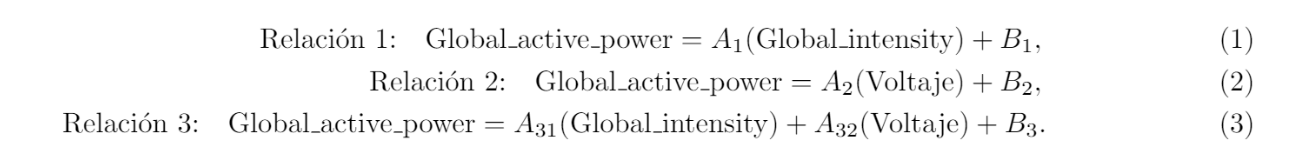

In [1]:
#-------------importar librerías
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
import matplotlib as mpl

In [2]:
#-------------importar datos
activep = pd.read_csv(r'c:\Users\Alexa\Downloads\datos\Global_active_power.csv') 
intensity = pd.read_csv(r'c:\Users\Alexa\Downloads\datos\Global_intensity.csv') 
reactivep = pd.read_csv(r'c:\Users\Alexa\Downloads\datos\Global_reactive_power.csv')
voltage = pd.read_csv(r'c:\Users\Alexa\Downloads\datos\Voltage.csv') 

In [3]:
#-------------unir datos

data1 = pd.merge(activep,intensity, on='Datetime')   #debería mejorarse (?)
data2 = pd.merge(reactivep,voltage, on='Datetime')
data = pd.merge(data1,data2, on='Datetime') 

data["Global_active_power"] = round(data["Global_active_power"]*1000/60, 3)
data["Global_reactive_power"] = round(data["Global_reactive_power"]*1000/60, 3)

data


,Datetime,Global_active_power,Global_intensity,Global_reactive_power,Voltage
0,2010-01-01 00:00:00,29.833,7.4,3.933,240.65
1,2010-01-01 00:01:00,29.667,7.4,3.900,240.07
2,2010-01-01 00:02:00,29.667,7.4,3.900,240.15
3,2010-01-01 00:03:00,29.100,7.2,3.100,240.26
4,2010-01-01 00:04:00,28.100,7.0,1.700,240.12
...,...,...,...,...,...
457390,2010-11-26 20:58:00,15.767,4.0,0.000,240.43
457391,2010-11-26 20:59:00,15.733,4.0,0.000,240.00
457392,2010-11-26 21:00:00,15.633,3.8,0.000,239.82
457393,2010-11-26 21:01:00,15.567,3.8,0.000,239.70


______________________________________________________________________________________________________________________________
## resample de la data 

In [4]:
#convertir la data de la columna Datetime en formato de tiempo
data["Datetime"]=pd.to_datetime(data["Datetime"])

#convertir la columna Datetime en el index del dataframe
dataind = data.set_index('Datetime') 

dataind


,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,
2010-01-01 00:00:00,29.833,7.4,3.933,240.65
2010-01-01 00:01:00,29.667,7.4,3.900,240.07
2010-01-01 00:02:00,29.667,7.4,3.900,240.15
2010-01-01 00:03:00,29.100,7.2,3.100,240.26
2010-01-01 00:04:00,28.100,7.0,1.700,240.12
...,...,...,...,...
2010-11-26 20:58:00,15.767,4.0,0.000,240.43
2010-11-26 20:59:00,15.733,4.0,0.000,240.00
2010-11-26 21:00:00,15.633,3.8,0.000,239.82


In [5]:
#resample de la data en días 

datday = dataind.resample('D').mean()

#limpiar la data de valores infinitos o inexistentes, ya que no se puede visualizar por completo el dataframe y se quiere
#prevenir errores
datday.replace([np.inf, -np.inf, 0], np.nan, inplace=True)
datday.dropna(inplace=True)

datday

,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,
2010-01-01,14.169592,3.537083,1.913614,242.565722
2010-01-02,19.603921,4.857778,1.444256,243.631743
2010-01-03,15.031576,3.757778,1.505511,241.822778
2010-01-04,19.530563,4.879028,1.672035,241.754160
2010-01-05,15.279607,3.929861,2.228298,240.647167
...,...,...,...,...
2010-12-07,12.842301,3.397222,3.309176,240.218646
2010-12-08,6.130765,1.623750,1.957152,240.794931
2010-12-09,18.658474,4.755694,2.330551,241.619722


In [6]:
#resample de la data en meses 

datmes = dataind.resample('M').mean()
datmes

,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,
2010-01-31,21.677334,5.430332,2.086377,242.338522
2010-02-28,19.292318,4.836624,1.824457,242.002101
2010-03-31,19.500255,4.920399,2.272798,241.475284
2010-04-30,17.272230,4.363496,2.159279,241.442527
2010-05-31,17.932618,4.551504,2.120356,241.296151
2010-06-30,16.255105,4.170282,2.425415,240.888985
2010-07-31,12.982458,3.337202,2.301545,240.965167
2010-08-31,15.490872,3.954423,2.180260,241.422944
2010-09-30,16.625685,4.223837,2.128339,241.267517


______________________________________________________________________________________________________________________________
## funciones 


In [7]:
#-------------definir las funciones que serán empleadas posteriormente


#ya que la primera relación es lineal 
def lineal(x,m,b): 
    return m*x+b 

#ya que la tercera relación es cuadrática
def squares(X,a1,a2,b):
    x,y = X
    return a1*x+a2*y+b

#función normalmente empleada para calcular el error en los coeficientes de ajuste
def error_fit(fun,x,y,r):
    popt, pcov = curve_fit(fun, x, y)
    popt, pcov = np.around(popt,r), np.around(pcov,r)
    E=np.sqrt(np.mean((y-fun(x, *popt))**2))
    E = np.around(E,r)
    print("El error en el ajuste es...",E)
    
    

In [8]:
#Se ultiliza un diccionario para luego al momento de graficar solo poner el termino y que al eje "x", eje "y"
#y titulo se le apliquen estos parametros

cute = {"family":"Arial","color":"blue","weight":"bold","size":14,}
cutex = {"family":"serif","color":"red","weight":"bold","size":12,}
cutey = {"family":"serif","color":"black","weight":"bold","size":12,}

_______________________________________________________________________________________________________________________________
## cálculos y gráficos 

### Relación 1 

In [9]:
#----------------cálculo de coeficientes relación 1

#minutos
f11, f111= curve_fit(lineal, data["Global_intensity"],data["Global_active_power"])

#dias
f12, f122 = curve_fit(lineal, datday["Global_intensity"],datday["Global_active_power"])

#meses
f13, f133 = curve_fit(lineal, datmes["Global_intensity"],datmes["Global_active_power"])



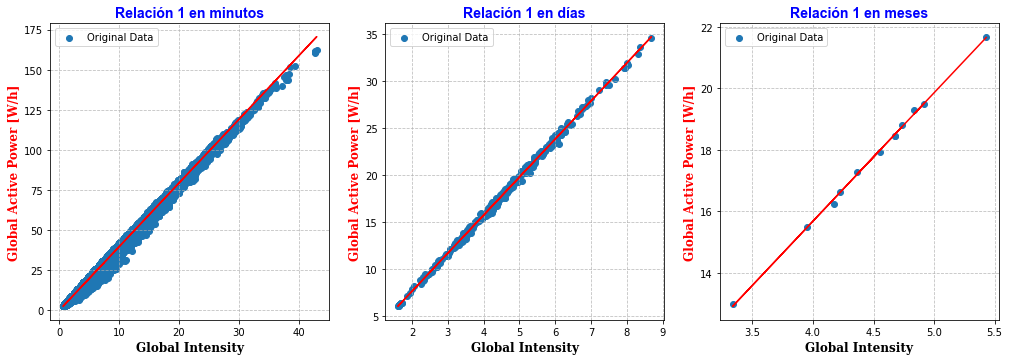

In [10]:
#-----------------Graficamos las relaciones para cada resample:

plt.figure(figsize=(17,12)) 
#Gráfica de relación 1 en minutos
ax1 = plt.subplot(231)
plt.plot(data["Global_intensity"], lineal(data["Global_intensity"],*f11),"r-")
plt.scatter(data["Global_intensity"],data["Global_active_power"], label = "Original Data")
ax1.set_title("Relación 1 en minutos", fontdict = cute)
ax1.set_xlabel("Global Intensity", fontdict = cutey)
ax1.set_ylabel("Global Active Power [W/h]", fontdict = cutex)
plt.legend()
plt.grid(linestyle="--", alpha =0.8)

#Gráfica de relación 1 en días
ax1 = plt.subplot(232)
plt.plot(datday["Global_intensity"], lineal(datday["Global_intensity"],*f12),"r-")
plt.scatter(datday["Global_intensity"],datday["Global_active_power"], label = "Original Data")
ax1.set_title("Relación 1 en días", fontdict = cute)
ax1.set_xlabel("Global Intensity", fontdict = cutey)
ax1.set_ylabel("Global Active Power [W/h]", fontdict = cutex)
plt.legend()
plt.grid(linestyle="--", alpha =0.8)

#Gráfica relación 1 en meses
ax1 = plt.subplot(233)
plt.plot(datmes["Global_intensity"], lineal(datmes["Global_intensity"],*f13),"r-")
plt.scatter(datmes["Global_intensity"],datmes["Global_active_power"], label = "Original Data")
ax1.set_title("Relación 1 en meses", fontdict = cute)
ax1.set_xlabel("Global Intensity", fontdict = cutey)
ax1.set_ylabel("Global Active Power [W/h]", fontdict = cutex)
plt.legend()
plt.grid(linestyle="--", alpha =0.8)

plt.show()


In [11]:
#----------------Se encuentran los errores posibles en la relación 1 para cada caso:
print('errores para la relación 1')
print('')
#min
print('minuto')
error_fit(lineal,data["Global_intensity"],data["Global_active_power"],6)
print('')

#day
print('día')
error_fit(lineal,datday["Global_intensity"],datday["Global_active_power"],6)
print('')

#mes 
print('mes')
error_fit(lineal,datmes["Global_intensity"],datmes["Global_active_power"],6)

errores para la relación 1

minuto
El error en el ajuste es... 0.820916

día
El error en el ajuste es... 0.253746

mes
El error en el ajuste es... 0.068759


Al obtener los errores para la relación 1 en minutos/días/meses podemos concluir que la mejor relación la presenta el analisis en meses puesto que presenta el menor error. y la relación que peor "esta" (que mayor error tiene) es la relación que presenta el analisis en minutos.

### Relación 2 

In [12]:
#----------------cálculo de coeficientes relación 2

#min
f21, f211 = curve_fit(lineal, data["Voltage"],data["Global_active_power"])

#day 
f22, f221 = curve_fit(lineal, datday["Voltage"],datday["Global_active_power"])

#mes 
f23, f231 = curve_fit(lineal, datmes["Voltage"],datmes["Global_active_power"])


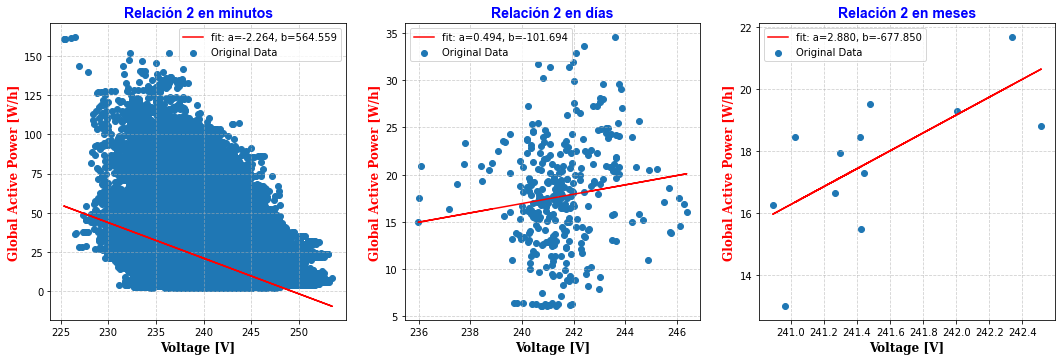

In [13]:
#---------------Graficamos las relaciones para cada resample:

plt.figure(figsize=(18,12)) 
#Gráfica de relación 2 en minutos
ax1 = plt.subplot(231)
plt.plot(data["Voltage"], lineal(data["Voltage"],*f21),"r-", label="fit: a=%5.3f, b=%5.3f" %tuple(f21))
plt.scatter(data["Voltage"],data["Global_active_power"], label = "Original Data")
ax1.set_title("Relación 2 en minutos", fontdict = cute)
ax1.set_xlabel("Voltage [V]", fontdict = cutey)
ax1.set_ylabel("Global Active Power [W/h]", fontdict = cutex)
plt.legend()
plt.grid(linestyle="--", alpha =0.6)

#Gráfica de relación 2 en días
ax1 = plt.subplot(232)
plt.plot(datday["Voltage"], lineal(datday["Voltage"],*f22),"r-", label="fit: a=%5.3f, b=%5.3f" %tuple(f22))
plt.scatter(datday["Voltage"],datday["Global_active_power"], label = "Original Data")
ax1.set_title("Relación 2 en días", fontdict = cute)
ax1.set_xlabel("Voltage [V]", fontdict = cutey)
ax1.set_ylabel("Global Active Power [W/h]", fontdict = cutex)
plt.legend()
plt.grid(linestyle="--", alpha =0.6)

#Gráfica de relación 2 en meses
ax1 = plt.subplot(233)
plt.plot(datmes["Voltage"], lineal(datmes["Voltage"],*f23),"r-", label="fit: a=%5.3f, b=%5.3f" %tuple(f23))
plt.scatter(datmes["Voltage"],datmes["Global_active_power"], label = "Original Data")
ax1.set_title("Relación 2 en meses", fontdict = cute)
ax1.set_xlabel("Voltage [V]", fontdict = cutey)
ax1.set_ylabel("Global Active Power [W/h]", fontdict = cutex)
plt.legend()
plt.grid(linestyle="--", alpha =0.6)

plt.show()





In [14]:
#----------------Se encuentran los errores posibles en la relación 2 para cada caso:
print('errores para la relación 2')
print('')
#min
print('minuto')
error_fit(lineal,data["Voltage"],data["Global_active_power"],6)
print('')

#day
print('día')
error_fit(lineal,datday["Voltage"],datday["Global_active_power"],6)
print('')

#mes 
print('mes')
error_fit(lineal,datmes["Voltage"],datmes["Global_active_power"],6)

errores para la relación 2

minuto
El error en el ajuste es... 14.146558

día
El error en el ajuste es... 5.688045

mes
El error en el ajuste es... 1.575367


Al obtener los errores para la relación 2 en minutos/días/meses podemos concluir que la mejor relación la presenta el analisis en meses puesto que presenta el menor error. y la relación que peor "esta" (que mayor error tiene) es la relación que presenta el analisis en minutos.

###  Relación 3 

In [15]:
#---------------cálculo de coeficientes

#min
#f31 = curve_fit(squares, (data["Global_intensity"], data["Voltage"]), data["Global_active_power"])
f31x, f31y = curve_fit(squares, (data["Global_intensity"], data["Voltage"]), data["Global_active_power"])

#day 
f32x,f32y = curve_fit(squares, (datday["Global_intensity"], datday["Voltage"]), datday["Global_active_power"])

#mes 
f33x,f32y = curve_fit(squares, (datmes["Global_intensity"], datmes["Voltage"]), datmes["Global_active_power"]) 


In [16]:
#--------------------- Se crea un array nuevo que vaya de los valores mínimos a los máximos de la data 

# esto se hace porque si se toman los valores tal y como están en la data original, es demasiado para el computador procesar 
#por lo tanto, se busca reescribir la data.

#min
min_GI = [np.min(data["Global_intensity"]), np.max(data["Global_intensity"]),(int(len(data["Global_intensity"])/1000))]
min_Vo = [np.min(data["Voltage"]), np.max(data["Voltage"]),(int(len(data["Voltage"])/1000))]

#day
d_GI = [np.min(datday["Global_intensity"]), np.max(datday["Global_intensity"]),(len(datday["Global_intensity"]))]
d_Vo = [np.min(datday["Voltage"]), np.max(datday["Voltage"]),len(datday["Voltage"])]

#mes
m_GI = [np.min(datmes["Global_intensity"]), np.max(datmes["Global_intensity"]),len(datmes["Global_intensity"])]
m_Vo = [np.min(datmes["Voltage"]), np.max(datmes["Voltage"]),len(datmes["Voltage"])]

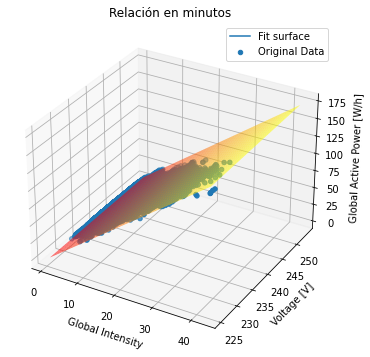

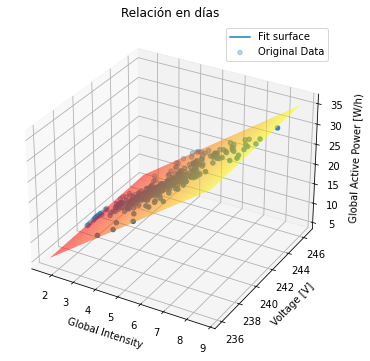

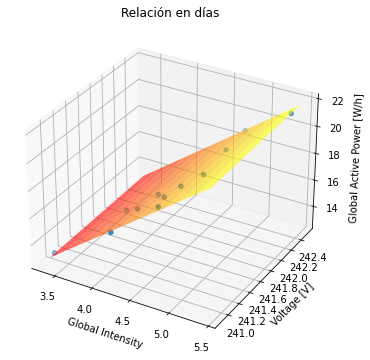

In [17]:
#---------------Graficamos las relaciones para cada resample:

#se hace un gráfico en 3D ya que la relación depende de 3 parámetros y se hace el ajuste como un plano.

plt.figure(figsize=(8,6))

#Gráfica de relación 3 en minutos
ax  = plt.axes(projection="3d")
x   = np.linspace(*min_GI)
y   = np.linspace(*min_Vo) 
xx, yy = np.meshgrid(x,y)
z = squares((xx,yy),*f31x)
scatter = ax.scatter3D(data["Global_intensity"],data["Voltage"],data["Global_active_power"])

ax.plot_surface(xx,yy,z,alpha=0.6,cmap="autumn") 
ax.set_title("Relación en minutos")
ax.set_xlabel("Global Intensity")
ax.set_ylabel("Voltage [V]")
ax.set_zlabel("Global Active Power [W/h]")
legends = mpl.lines.Line2D([0],[0])
ax.legend([legends,scatter],["Fit surface", "Original Data"], numpoints = 1)
plt.show() 



#Gráfica de relación 3 en días
plt.figure(figsize=(8,6))
ax2  = plt.axes(projection="3d")
x2   = np.linspace(*d_GI)
y2   = np.linspace(*d_Vo) 
xx2, yy2 = np.meshgrid(x2,y2)
z2 = squares((xx2,yy2),*f32x)
ax2.scatter3D(datday["Global_intensity"],datday["Voltage"],datday["Global_active_power"])

ax2.plot_surface(xx2,yy2,z2,alpha=0.6,cmap="autumn") 
ax2.set_title("Relación en días")
ax2.set_xlabel("Global Intensity")
ax2.set_ylabel("Voltage [V]")
ax2.set_zlabel("Global Active Power [W/h)")
legends = mpl.lines.Line2D([0],[0])
ax2.legend([legends,scatter],["Fit surface", "Original Data"], numpoints = 1)
plt.show() 


#Gráfica de relación 3 en días
plt.figure(figsize=(8,6))
ax3  = plt.axes(projection="3d")
x3   = np.linspace(*m_GI)
y3   = np.linspace(*m_Vo) 
xx3, yy3 = np.meshgrid(x3,y3)
z3 = squares((xx3,yy3),*f33x)
ax3.scatter3D(datmes["Global_intensity"],datmes["Voltage"],datmes["Global_active_power"])

ax3.plot_surface(xx3,yy3,z3,alpha=0.6,cmap="autumn") 
ax3.set_title("Relación en días")
ax3.set_xlabel("Global Intensity")
ax3.set_ylabel("Voltage [V]")
ax3.set_zlabel("Global Active Power [W/h]")
legends = mpl.lines.Line2D([0],[0])
ax2.legend([legends,scatter],["Fit surface", "Original Data"], numpoints = 1)
plt.show()




In [18]:
#----------------Se encuentran los errores posibles en la relación 2 para cada caso:

print('errores para la relación 3')
print('')
#min
print('minuto')
error_fit(squares,(data["Global_intensity"], data["Voltage"]),data["Global_active_power"], 6)
print('')

#day
print('día')
error_fit(squares,(datday["Global_intensity"], datday["Voltage"]),datday["Global_active_power"], 6)
print('')

#mes 
print('mes')
error_fit(squares,(datmes["Global_intensity"], datmes["Voltage"]),datmes["Global_active_power"], 6) 


errores para la relación 3

minuto
El error en el ajuste es... 0.796032

día
El error en el ajuste es... 0.198983

mes
El error en el ajuste es... 0.046468


_______________________________________________________________________________________________________________________________

## CONCLUSIÓN: 

Se puede observar que en todos los casos estudiados, las relaciones siempre daban error en las medidas de meses siempre el error es menor. Esto va a corde con los datos tomados ya que los meses son el resultado de los promedios en un resample aplicado a la data original. 

Por otra parte, los datos de la relación 3 son menores tanto en minutos, días y meses con respecto a las otras 2 relaciones. De aquí se concluye que es la que tiene menor error promedio y que por ende, es la relación más acertada para el caso estudiado. 